<a href="https://colab.research.google.com/github/i-dontno/Assignment-Frontend/blob/main/aider_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/My Drive/Colab Notebooks/Tensorflow with Daniel/AIDER.zip"  # Adjust if needed
extract_path = "/content/drive/My Drive/Colab Notebooks/Tensorflow with Daniel/aider"


In [ ]:
#this is for unzipping file
#this is done dont touch this
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

In [ ]:
#this is for splitting the data into train and test
#it is done now dont touch thisfile
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Paths
dataset_path = "/content/drive/My Drive/Colab Notebooks/Tensorflow with Daniel/aider/AIDER"  # Change this if needed
output_dir = "/content/drive/My Drive/Colab Notebooks/Tensorflow with Daniel/aider_split"

train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

# Create train & test directories
for split in [train_dir, test_dir]:
    os.makedirs(split, exist_ok=True)

# Get classes - Assuming your classes are subfolders within 'dataset_path'
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Split each class
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    # Get all files within the class subfolder
    all_files = os.listdir(class_path)
    # Filter for image files (you might need to adjust the file extensions)
    images = [f for f in all_files if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # If no images are found, skip this class
    if not images:
        print(f"No images found in class: {class_name}, skipping...")
        continue

    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class subfolders in train/test directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Move files
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset split complete! 🚀")

Dataset split complete! 🚀


In [ ]:
#this is for making json but currently dont touch this file

import os
import json

# Path to your dataset
dataset_path = "/content/drive/My Drive/AIDER_extracted"  # Update this if needed

# Metadata dictionary
metadata = {"root": {}}

# Loop through each class folder
for class_name in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        images = sorted(os.listdir(class_path))  # Sort to maintain order
        total_images = len(images)

        # Split into chunks of 100
        batches = [images[i:i+100] for i in range(0, total_images, 100)]

        # Store paths in JSON format
        metadata["root"][class_name] = {}
        for idx, batch in enumerate(batches):
            metadata["root"][class_name][f"{idx*100}-{(idx+1)*100}"] = [f"{class_name}/{img}" for img in batch]

# Save metadata as JSON
json_path = "/content/drive/My Drive/AIDER_extracted/metadata.json"  # Change path if needed
with open(json_path, "w") as json_file:
    json.dump(metadata, json_file, indent=4)

print(f"Metadata JSON created successfully at {json_path} ✅")


#files before this dont touch as now they are have no use for us


In [2]:
#get the class names programmatically
import pathlib
import numpy as np
import os

data_dir = pathlib.Path("/content/drive/My Drive/Colab Notebooks/Tensorflow with Daniel/aider_split/train")

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
# Created a list of class names from subdirectory

print(class_names)

['collapsed_building' 'flooded_areas']


In [3]:
#lets visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random

def view_random_image(target_dir, target_class):
  #setup the targe directory
  target_folder = target_dir + target_class

  #get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # it is saying is "randomly sample one 1 image from target_folder"

  #read the image and plot
  img = mping.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}") # show shape of image

  return img


['flood_image0442.jpg']
image shape: (491, 635, 3)


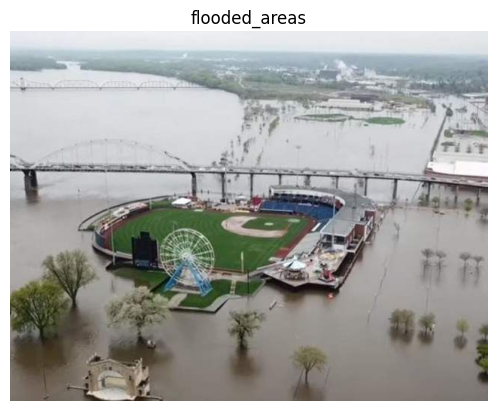

In [4]:
# view a random image from training dataset
img = view_random_image(target_dir = "/content/drive/My Drive/Colab Notebooks/Tensorflow with Daniel/aider_split/train/",
                        target_class ="flooded_areas")

In [5]:
img.shape

(491, 635, 3)

## first end-to-end example

Let's build a CNN to find patterns inour images,
more specifically we a need way to:

* Load our Images
* Preprocess our Images
* Build CNN to find patterns
* Compile CNN
*fit CNN to our training data

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)
# Preprocess data (get all the of the pixel values between 0 & 1, also called scaling or normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup path for our directories
train_dir = "/content/drive/My Drive/Colab Notebooks/Tensorflow with Daniel/aider_split/train/"
test_dir = "/content/drive/My Drive/Colab Notebooks/Tensorflow with Daniel/aider_split/test/"
#import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)



Found 828 images belonging to 2 classes.
Found 209 images belonging to 2 classes.


In [10]:
images,labels=next(train_data)
#find out the use of this line

In [15]:
# build a CNN a model( which is same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation ="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = "valid"),


    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics= ["accuracy"] )

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        # batch_size=128,
                        validation_data= valid_data,
                        validation_steps=len(valid_data)
                        )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 451s 17s/step - accuracy: 0.5090 - loss: 0.7032 - val_accuracy: 0.5502 - val_loss: 0.6639
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.5917 - loss: 0.6306 - val_accuracy: 0.8086 - val_loss: 0.5232
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.7672 - loss: 0.5161 - val_accuracy: 0.8182 - val_loss: 0.3998
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 297ms/step - accuracy: 0.8297 - loss: 0.3836 - val_accuracy: 0.8469 - val_loss: 0.4041
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accuracy: 0.8644 - loss: 0.3024 - val_accuracy: 0.8038 - val_loss: 0.5046


In [17]:
class_names[0]

np.str_('collapsed_building')

next time when you fit your model just remove ( stpes per epoch and see what happens)

In [ ]:
#lets plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [ ]:
#plot the training and validation curves separately
def plot_curves(history):

  """
  Returns separate loss curves for training and validation metrics.
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["history"]
  val_accuracy=history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot the loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

   #plot the accuracy
  plt.figure()   #for new plt use thisaa
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()